In [186]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pickle
from mpl_toolkits import mplot3d

In [176]:
import warnings
warnings.filterwarnings("ignore")

If use colab --> Need to mount with Google Drive

### 1. Loading dataset

In [78]:
ANNOTATIONS_CSV = os.path.join('dataset', 'insurance.csv')

In [102]:
df = pd.read_csv(ANNOTATIONS_CSV)
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### 2. Data preprocessing - Explore dataset Analysis (EDA)

##### Explain columns
+ age: age of primary beneficiary
+ sex: insurance contractor gender, female, male
+ bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
+ children: Number of children covered by health insurance / Number of dependents
+ smoker: Smoking
+ region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
+ charges: Individual medical costs billed by health insurance


In [103]:
num_samples, num_features = df.shape[0], df.shape[1] 
print(f'num_samples = {num_samples}')
print(f'num_features = {num_features}')

num_samples = 1338
num_features = 7


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


+ non-null values

In [105]:
sex_list = df.sex.unique().tolist()
smoker_list = df.smoker.unique().tolist()
region_list = df.region.unique().tolist()

print(f'sex_list = {sex_list}')
print(f'smoker_list = {smoker_list}')
print(f'region_list = {region_list}')

sex_list = ['female', 'male']
smoker_list = ['yes', 'no']
region_list = ['southwest', 'southeast', 'northwest', 'northeast']


In [106]:
obj_list = df.select_dtypes(include = "object").columns
print(obj_list)

Index(['sex', 'smoker', 'region'], dtype='object')


+ Label-Encoder

In [107]:
for feature in obj_list:
    globals()[f"encoder_{feature}"] = LabelEncoder() # auto create variables: encoder_sex, encoder_smoker, encoder_smoker
    df[feature] = globals()[f"encoder_{feature}"].fit_transform(df[feature].astype(str))

In [108]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

##### Three-ways to see the Linear-Releationship

In [10]:
df.corr(method = "pearson")

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000

<AxesSubplot:>

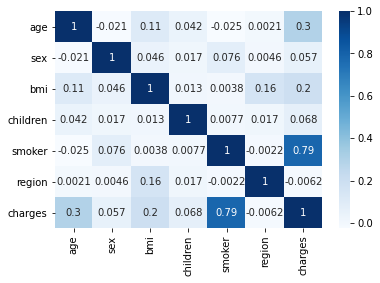

In [37]:
sns.heatmap(df.corr(method = "pearson"), annot = True, cmap = 'Blues')

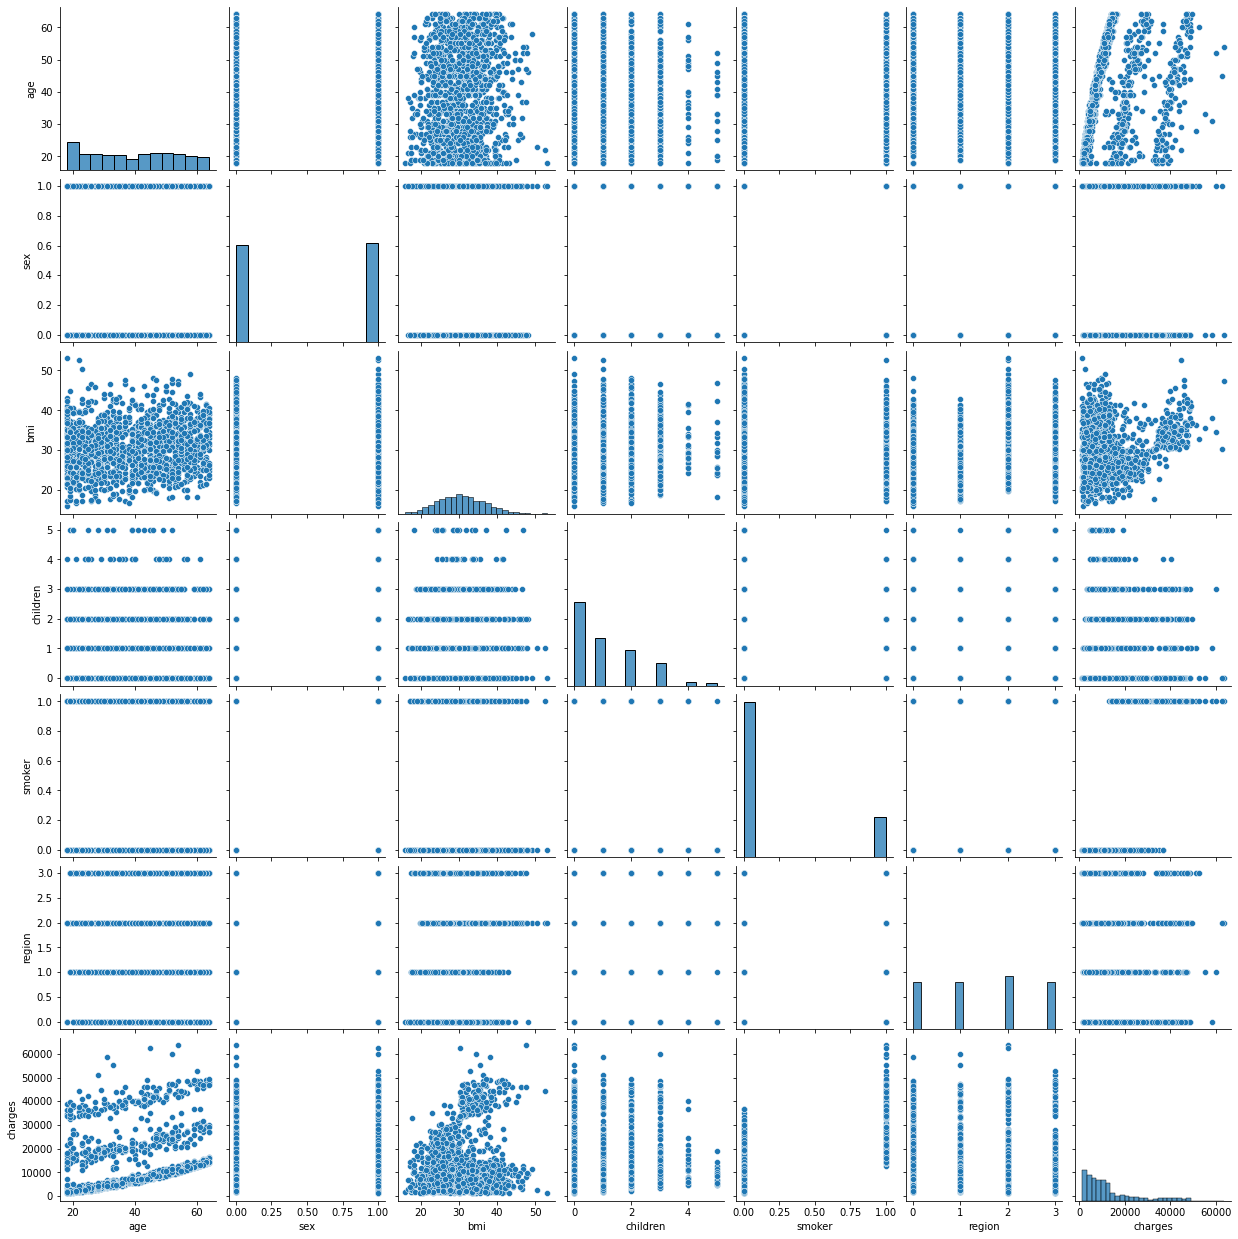

In [41]:
sns.pairplot(df)

Choose 3 columns:
+ age
+ bmi
+ smoker

In [109]:
df = df[["age", "bmi", "smoker", "charges"]]

In [110]:
X = df[['age', 'bmi', 'smoker']].values
y = df[['charges']].values

<AxesSubplot:>

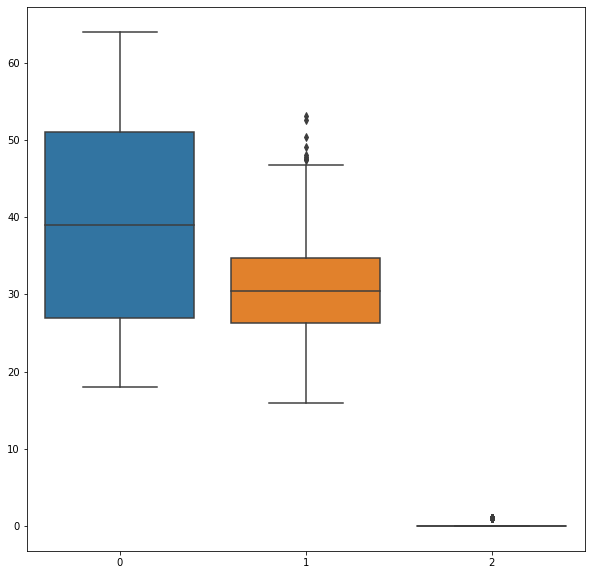

In [111]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = X)

+ Must to MinMax scaler

In [112]:
scaler = MinMaxScaler()

In [113]:
scaler.fit(X)
X_scaler = scaler.transform(X)

<AxesSubplot:>

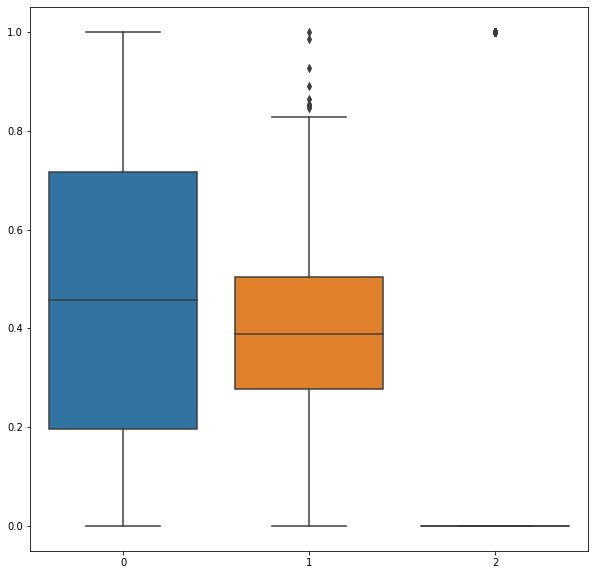

In [90]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = X_scaler)

##### Train/val split (ratio 80-20)

In [114]:
VAL_RATIO = 0.2
SEED = 42

In [115]:
X_train, X_val, y_train, y_val = train_test_split(X_scaler, y, test_size = VAL_RATIO, random_state = SEED)

In [116]:
num_train = X_train.shape[0]
num_val = X_val.shape[0]

print(f"num_train = {num_train}")
print(f"num_val = {num_val}")

num_train = 1070
num_val = 268


### 3. Create model

In [117]:
linear_model = LinearRegression()

### 4. Trainning 

In [118]:
linear_model.fit(X_train, y_train)
# print message when done 
print(f'Done')

Done


### 5. Validating

In [119]:
y_hat = linear_model.predict(X_val)

In [120]:
performance = pd.DataFrame({"Actual" : y_val.squeeze(1), 
                            "Predicted" : y_hat.squeeze(1)})
performance.head()

Actual     Predicted
0   9095.06825   8184.041468
1   5272.17580   7431.001001
2  29330.98315  37346.437099
3   9301.89355   8629.528305
4  33750.29180  27316.654810

### 6. Check model

In [121]:
score_train = linear_model.score(X_train, y_train) # or r2_score(y_train, linear_model.predict(X_train))
score_val = linear_model.score(X_val, y_val)

print(f"score_train = {score_train:.2f}")
print(f"score_val = {score_val:.2f}")

score_train = 0.74
score_val = 0.78


In [122]:
RMSE_train = sqrt(mean_squared_error(y_train, linear_model.predict(X_train)))
RMSE_val = sqrt(mean_squared_error(y_val, linear_model.predict(X_val)))

print(f"RMSE_train = {RMSE_train:.2f}")
print(f"RMSE_val = {RMSE_val:.2f}")

RMSE_train = 6134.99
RMSE_val = 5874.76


### Regression hyperlane

In [124]:
m = linear_model.coef_
b = linear_model.intercept_

print(f"m = {m}")
print(f"b = {b}")

m = [[11932.86941266 12134.15512912 23675.37184666]]
b = [-1828.27294621]


### Other case

Choose 2 columns:
+ age
+ smoker

In [125]:
df = df[["age", "smoker", "charges"]]

In [126]:
X = df[['age', 'smoker']].values
y = df[['charges']].values

In [128]:
scaler_2 = MinMaxScaler()
scaler_2.fit(X)
X_scaler = scaler_2.transform(X)

<AxesSubplot:>

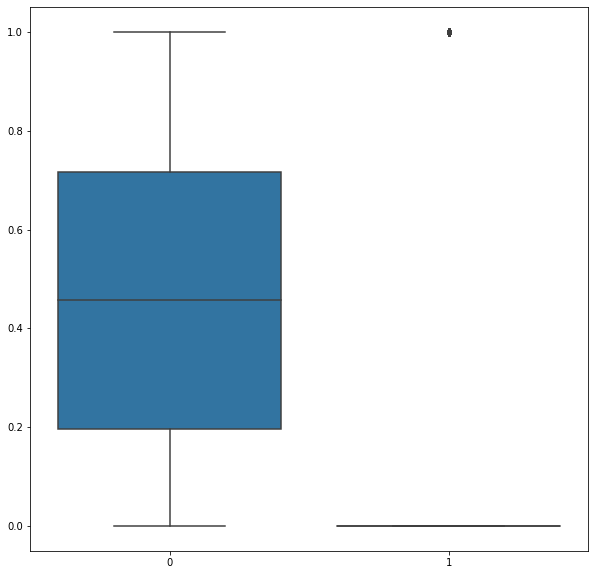

In [129]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = X_scaler)

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_scaler, y, test_size = VAL_RATIO, random_state = SEED)

In [131]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# print message when done 
print(f'Done')

Done


In [132]:
score_train = linear_model.score(X_train, y_train) # or r2_score(y_train, linear_model.predict(X_train))
score_val = linear_model.score(X_val, y_val)

print(f"score_train = {score_train:.2f}")
print(f"score_val = {score_val:.2f}")

score_train = 0.71
score_val = 0.75


In [133]:
RMSE_train = sqrt(mean_squared_error(y_train, linear_model.predict(X_train)))
RMSE_val = sqrt(mean_squared_error(y_val, linear_model.predict(X_val)))

print(f"RMSE_train = {RMSE_train:.2f}")
print(f"RMSE_val = {RMSE_val:.2f}")

RMSE_train = 6439.89
RMSE_val = 6186.65


In [134]:
m = linear_model.coef_
b = linear_model.intercept_

print(f"m = {m}")
print(f"b = {b}")

m = [[12696.43149167 23688.60232572]]
b = [2580.80107354]


In [178]:
# coordinates_plane: a * x1 + b * x2 + c * x3 (= y) + d
# in this case plane: coef_smoke * x + coef_age * y + coef_charage * z + intercept_
coordinates_plane = np.array([m[0][1], m[0][0], -1, b[0]])
coordinates_plane

array([ 2.36886023e+04,  1.26964315e+04, -1.00000000e+00,  2.58080107e+03])

In [183]:
coordinates_plane = np.array([m[0][1], m[0][0], -1, b[0]])
# create x,y
xx, yy = np.meshgrid(np.linspace(0, 1, num = 10), np.linspace(0, 1, num = 10))
z = (-coordinates_plane[0] * xx - coordinates_plane[1] * yy - coordinates_plane[3]) * 1. /coordinates_plane[2]
print(f"z.shape = {z.shape}")

z.shape = (10, 10)


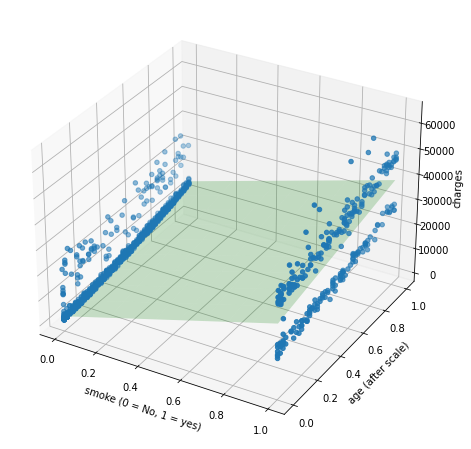

In [185]:
plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')
ax.scatter3D(X_scaler[:, 1], X_scaler[:, 0], y)
ax.plot_surface(xx, yy, z, alpha = 0.2, color = 'green')

ax.set_ylabel('age (after scale)')
ax.set_xlabel('smoke (0 = No, 1 = yes)')
ax.set_zlabel('charges')

plt.show()

### 7. Save model

In [195]:
os.makedirs('saved_model', exist_ok = True)
pickle_file = os.path.join("saved_model", "Linear_Regression.pkl")
with open (pickle_file, "wb") as file:
  pickle.dump(linear_model, file)
print(f"DONE SAVE")

DONE SAVE


Open model (other workspace)

In [196]:
pkl_filename = pickle_file
with open(pkl_filename, "rb") as file:
  linear_model_loaded = pickle.load(file)

In [197]:
linear_model_loaded.coef_, linea_model_loaded.intercept_

(array([[12696.43149167, 23688.60232572]]), array([2580.80107354]))